In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
model_path= os.path.join('../models/100_84_DN121_TL3_GAP.h5')
classes_path= os.path.join('../models/100_84_DN121_TL3_GAP.csv')

In [4]:
import pandas as pd

In [6]:
liste=['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_soup', 'mussels', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck', 'pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 'shrimp_and_grits', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare', 'waffles']

In [8]:
to_csv=pd.DataFrame(liste)

In [12]:
to_csv.to_csv("Cat.csv",index=False)

In [5]:
pd.read_csv(classes_path)

,Categories
0,bruschetta
1,ceviche
2,chicken_wings
3,dumplings
4,french_toast
5,miso_soup
6,onion_rings
7,prime_rib
8,samosa
9,waffles


In [41]:
filepath = os.path.join('..','..','1005649.jpg')

In [6]:
img = plt.imread(filepath)

In [7]:
img.shape

(512, 308, 3)

In [8]:
img_reshaped=img.reshape(img.shape[0]*img.shape[1]*img.shape[2])

In [9]:
img_reshaped.shape

(473088,)

In [10]:
img_reshaped.reshape((512, 308, 3))

array([[[59, 59, 49],
        [62, 59, 50],
        [62, 59, 50],
        ...,
        [48, 47, 42],
        [49, 48, 43],
        [48, 47, 42]],

       [[54, 55, 47],
        [55, 56, 48],
        [57, 58, 50],
        ...,
        [33, 32, 27],
        [38, 37, 32],
        [47, 46, 41]],

       [[40, 45, 38],
        [42, 47, 40],
        [45, 50, 44],
        ...,
        [23, 26, 19],
        [27, 30, 23],
        [39, 42, 35]],

       ...,

       [[54, 61, 30],
        [59, 63, 38],
        [64, 63, 45],
        ...,
        [44, 39, 35],
        [44, 39, 35],
        [44, 39, 35]],

       [[62, 69, 35],
        [65, 70, 40],
        [67, 66, 46],
        ...,
        [43, 38, 34],
        [42, 37, 33],
        [41, 36, 32]],

       [[65, 73, 36],
        [69, 72, 41],
        [72, 70, 49],
        ...,
        [41, 36, 32],
        [40, 35, 31],
        [39, 34, 30]]], dtype=uint8)

In [11]:
img_list = img_reshaped.tolist()

In [12]:
json_str = json.dumps(img_list)

In [13]:
url = "http://127.0.0.1:8000/items/"
data=json.dumps({"image_reshape":json_str,
                     "height": img.shape[0],
                     "width": img.shape[1],
                     "color": img.shape[2]})
headers = {'Content-type': 'application/json'}

In [15]:
requests.post(url,data,headers=headers).json()

'item'

In [20]:
filepath = os.path.join('..','Image.obj')

In [21]:
file = open(filepath,'rb')
object_file = pickle.load(file)

In [22]:
print(object_file)

[[[59 59 49]
  [62 59 50]
  [62 59 50]
  ...
  [48 47 42]
  [49 48 43]
  [48 47 42]]

 [[54 55 47]
  [55 56 48]
  [57 58 50]
  ...
  [33 32 27]
  [38 37 32]
  [47 46 41]]

 [[40 45 38]
  [42 47 40]
  [45 50 44]
  ...
  [23 26 19]
  [27 30 23]
  [39 42 35]]

 ...

 [[54 61 30]
  [59 63 38]
  [64 63 45]
  ...
  [44 39 35]
  [44 39 35]
  [44 39 35]]

 [[62 69 35]
  [65 70 40]
  [67 66 46]
  ...
  [43 38 34]
  [42 37 33]
  [41 36 32]]

 [[65 73 36]
  [69 72 41]
  [72 70 49]
  ...
  [41 36 32]
  [40 35 31]
  [39 34 30]]]


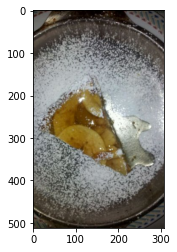

In [23]:
plt.imshow(object_file);

In [28]:
import tensorflow as tf
import os
from tensorflow import keras

In [44]:
model_path= os.path.join('..','models/10_VGG16.csv')

In [26]:
model = keras.models.load_model(model_path)

2021-11-24 15:40:53.712242: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-24 15:40:53.712293: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-24 15:40:53.712313: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-EUET6SA): /proc/driver/nvidia/version does not exist
2021-11-24 15:40:53.712530: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
image_resized=tf.image.resize(object_file,[224, 224])

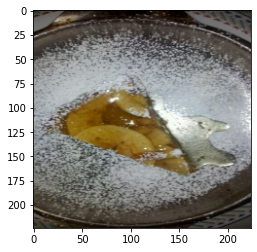

In [38]:
plt.imshow(image_resized/255)

In [79]:
result=model.predict(np.array([image_resized/255]))

In [88]:
result

array([[2.2986994e-04, 6.8621378e-04, 3.0747528e-06, 1.1331429e-05,
        9.6013957e-01, 3.8949209e-03, 5.1044949e-06, 7.9589328e-03,
        5.4532029e-03, 2.1617802e-02]], dtype=float32)

In [81]:
import pandas as pd

In [83]:
classes_path= os.path.join('..','models/10_VGG16.csv')

In [85]:
categories=pd.read_csv(classes_path)

In [86]:
categories

,Categories
0,bruschetta
1,ceviche
2,chicken_wings
3,dumplings
4,french_toast
5,miso_soup
6,onion_rings
7,prime_rib
8,samosa
9,waffles


In [87]:
categories.iloc[np.argmax(result),0]

'french_toast'

In [73]:
url = "http://127.0.0.1:8000/predict/"
data=json.dumps({"image_reshape":json_str,
                     "height": img.shape[0],
                     "width": img.shape[1],
                     "color": img.shape[2]})
headers = {'Content-type': 'application/json'}

In [75]:
requests.post(url,data,headers=headers).json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [90]:
model_path= os.path.join('..','models/10_VGG16.h5')

In [91]:
def load_model(model_path):
    model = keras.models.load_model(model_path)
    return model

In [92]:
load_model(model_path)

# Working on emissions

In [92]:
import pandas as pd
file_path='../footprint_data/ingredients_weights_emissions.csv'

In [93]:
df=pd.read_csv(file_path)
df

,Ingedient,Weight(g),Emissions(gCO2)
0,Allspice,1000,1133
1,Almond extract,1000,656
2,Almonds,1000,2856
3,Anchovies,1000,4220
4,Apple juice,1000,2440
...,...,...,...
405,Whiskey,1000,2320
406,Whiting,1000,4362
407,Wine,1000,1369
408,Worcestershire sauce,1000,222


In [23]:
output_dict= {'ingredient':['beef','shrimp'],'value':['300','200'],'metric':'g'}

# Pseudo code for preprocessing

1. Fill the empty strings (metrics)
2. Create a name matching

## Filling the empty strings

In [ ]:
output_dict= {'ingredient':['beef','shrimp'],'value':['300','200'],'metric':'g'}

In [37]:
output=pd.DataFrame(output)

In [38]:
output

,ingredient,value,metric
0,Beef,300,g
1,Shrimp,200,g


In [42]:
output.metric.replace(np.nan, "g", inplace=True) #Replace NaN by "g"

## Name matching using regex

In [116]:
key1="Beef"

In [44]:
import regex

In [117]:
df[df['Ingedient'].str.match(r'.*'+str(key1)+'.*')== True]

,Ingedient,Weight(g),Emissions(gCO2)
21,Beef,1000,43330


In [93]:
df[df['Ingedient']=="Beef"]

,Ingedient,Weight(g),Emissions(gCO2)
21,Beef,1000,43330


## Building the for loop 

In [171]:
file_path='../footprint_data/ingredients_emissions.csv'

In [172]:
df=pd.read_csv(file_path)
df.drop(columns='Unnamed: 0', inplace=True)

In [254]:
df.drop(columns='value', inplace=True)

In [257]:
df.to_csv('../footprint_data/final_ingredients_emissions.csv',index=False)

In [263]:
output_dict= {'ingredient':['beef','shrimp','rer'],'value':['300','200'],'metric':'g'}

### Extracting the emissions

In [251]:
final_dict={'ingredient':[], 'emission':[]}
for ingredient in output_dict['ingredient']:
    try:
        final_dict['ingredient'].append(df[df['ingredient'].str.match(r'.*'+str(ingredient)+'.*')== True].ingredient.values[0])
        final_dict['emission'].append(df[df['ingredient'].str.match(r'.*'+str(ingredient)+'.*')== True].emissions.values[0])
    except IndexError:
        print(f'{ingredient} is missing')

rer is missing


In [252]:
final_dict

{'ingredient': ['beef', 'shrimp'], 'emission': [43330, 17746]}

In [204]:
output_df=pd.DataFrame(final_dict)

In [264]:
output_df['value']=output_dict['value']

In [265]:
output_df['metric']=output_dict['metric']

In [266]:
output_df

,ingredient,emission,value,metric,to_Kg_multiplier,calculated_emissions,calculated_emissions g
0,beef,43330,300,g,0.001,43.330,12999.0
1,shrimp,17746,200,g,0.001,17.746,3549.2


### Convert the values

In [258]:
data = {'metric':['g', 'ml', 'tsps', 'Tbsps', 'lb'],'to_Kg_multiplier':[1/1000, 1/1000, 5/1000, 15/1000, 1/2.2]}

conv_df = pd.DataFrame(data)
conv_df

,metric,to_Kg_multiplier
0,g,0.001000
1,ml,0.001000
2,tsps,0.005000
3,Tbsps,0.015000
4,lb,0.454545


In [260]:
conv_df.to_csv("conversion.csv", index=False)

In [224]:
output_df=output_df.merge(conv_df, on='metric')

In [232]:
output_df.dtypes

ingredient                 object
emission                    int64
value                      object
metric                     object
to_Kg_multiplier          float64
calculated_emissions      float64
calculated_emissions g    float64
dtype: object

In [234]:
output_df["calculated gCO2e"]=output_df["emission"]*output_df["value"].astype('int64')*output_df["to_Kg_multiplier"]

In [235]:
output_df.dr

,ingredient,emission,value,metric,to_Kg_multiplier,calculated_emissions,calculated_emissions g
0,beef,43330,300,g,0.001,43.330,12999.0
1,shrimp,17746,200,g,0.001,17.746,3549.2


In [261]:
conversion_file_path='conversion.csv'

df=pd.read_csv(conversion_file_path)

In [262]:
df

,metric,to_Kg_multiplier
0,g,0.001000
1,ml,0.001000
2,tsps,0.005000
3,Tbsps,0.015000
4,lb,0.454545


## Trying it all

In [63]:
import pandas as pd
import numpy as np
missing_values = ["<unit>", 'None']

In [87]:
output_dict= {'ingredient':['beef','shrimp','rer'],'value':['300','200','20'], 'metric':[None,'piece','clove']}

In [78]:
pd.DataFrame(output_dict)

,ingredient,value,metric
0,beef,300,None
1,shrimp,200,piece
2,rer,20,clove


In [85]:
def fill_empties(output_dict):
    output_df=pd.DataFrame(output_dict)
    output_df.metric=output_df.metric.astype(str)
    for item in missing_values:
        output_df.metric.replace(item, "g", inplace=True)
    return output_df

In [89]:
output_df=fill_empties(output_dict)

In [96]:
df=pd.read_csv('/home/mateo/code/Matbeac/fritz/footprint_data/final_ingredients_emissions.csv')

In [104]:
def match_ingredients(output_df):
    final_dict={'ingredient':[], 'emission':[]}
    missing_ingredients={'missing_ingredients':[]}
    for ingredient in output_dict['ingredient']:
        try:
            final_dict['ingredient'].append(df[df['ingredient'].str.match(r'.*'+str(ingredient)+'.*')== True].ingredient.values[0])
            final_dict['emission'].append(df[df['ingredient'].str.match(r'.*'+str(ingredient)+'.*')== True].emissions.values[0])
        except IndexError:
            missing_ingredients['missing_ingredients'].append(ingredient)
    final_df=pd.DataFrame(final_dict)
    
    # Adding the columns "value" and metric from output_dict
    final_df['value']=output_df['value']
    final_df['metric']=output_df['metric']
    return final_df,missing_ingredients

In [108]:
ingredients,missing_ingredients=match_ingredients(output_df)

In [111]:
ingredients

,ingredient,emission,value,metric
0,beef,43330,300,g
1,shrimp,17746,200,piece
